<a href="https://colab.research.google.com/github/jacobbstephen/ML_Programs/blob/main/carDataPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [ ]:
car_data = pd.read_csv('/content/car data.csv')

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


DATA PREPROPESSING

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [ ]:
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
# encoding "Fuel_Type" Column
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


MULTIVARIABLE

Split the dataset into train and test dataset

In [ ]:
X = car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_data['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

MODEL TRAINING

In [ ]:
linear_model =  LinearRegression()

In [ ]:
linear_model.fit(X_train, Y_train)

LinearRegression()

prediction on train data

In [ ]:
training_data_prediction = linear_model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train,training_data_prediction)
print(error_score)

0.8799451660493711


prediction on test data

In [ ]:
test_data_prediction = linear_model.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print(error_score)

0.8365766715027051


Predicitive System

In [ ]:
feature_names = ['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

# Create a DataFrame with the same feature names
input_data = (2014, 5.59, 27000, 0, 0, 0, 0)
input_data_df = pd.DataFrame([input_data], columns=feature_names)

# Predict
prediction = linear_model.predict(input_data_df)
print(prediction)


[3.83901354]


SINGLE VARIABLE

Plot a correlationn matrix

In [ ]:
import seaborn as sns


<Axes: >

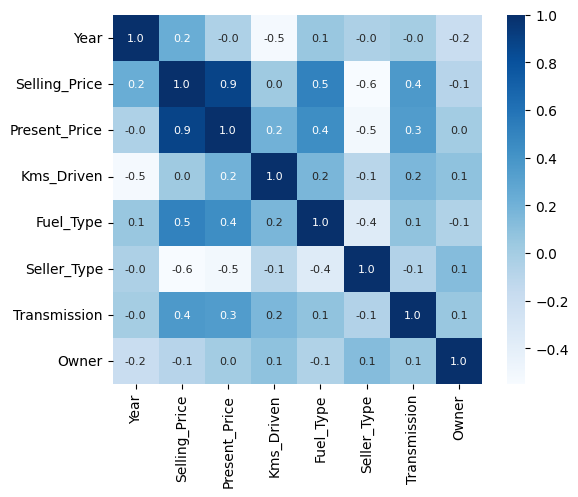

In [ ]:
car = car_data.drop(['Car_Name'], axis = 1)
correlation = car.corr()
sns.heatmap(correlation,cbar = True,square = True, fmt = '.1f',annot=True,annot_kws={'size':8},cmap='Blues')

selling price has a good relation with present price

In [ ]:
X = car_data['Present_Price']
Y = car_data['Selling_Price']
print(X)
print(Y)

0       5.59
1       9.54
2       9.85
3       4.15
4       6.87
       ...  
296    11.60
297     5.90
298    11.00
299    12.50
300     5.90
Name: Present_Price, Length: 301, dtype: float64
0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [ ]:
X_train = X_train.to_numpy()

X_train = X_train.reshape(-1, 1)


In [ ]:
linear_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
training_data_prediction = linear_model.predict(X_train)
error_score = metrics.r2_score(Y_train,training_data_prediction)
print(error_score)

0.7665426063058748


In [ ]:
feature_names = ['Present_Price']

# Create a DataFrame with the same feature names
input_data = (5.59)
input_data_df = pd.DataFrame([input_data], columns=feature_names)

# Predict
prediction = linear_model.predict(input_data_df)
print(prediction)

[3.59920718]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_data['Selling_Price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [ ]:
# convert input features into polynomial features using PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train) #transform the  training data
X_test_poly = poly.fit_transform(X_test) #transform the test data

In [ ]:
linear_model =  LinearRegression()
linear_model.fit(X_train_poly, Y_train)


LinearRegression()

In [ ]:
training_data_prediction = linear_model.predict(X_train_poly)
error_score = metrics.r2_score(Y_train,training_data_prediction)
print(error_score)

0.9753754840533995


In [ ]:
testing_data_prediction = linear_model.predict(X_test_poly)
error_score = metrics.r2_score(Y_test,testing_data_prediction)
print(error_score)

0.9681292651240729
